### CONTENTS
#### 1 Importing libraries
#### 2 Importing data 
#### 3 Data wrangling
#### 4 Principal components analysis
#### 5 Cluster analysis on data reduced to 4 principal components
#### 6 Principal components, clusters and true labels plots

# 1 Importing libraries

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [254]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 2 Importing data

In [221]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [223]:
# Upload original data

In [225]:
climate = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [227]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [229]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3 Data wrangling

In [232]:
climate.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [234]:
# Drop weather stations for which pleasant/unpleasant classification is not available

In [236]:
cols_to_drop = [col for col in climate.columns if any(city in col for city in ['GDANSK', 'ROMA', 'TOURS'])]


In [238]:
climate = climate.drop(columns=cols_to_drop)

In [240]:
# Scaling

In [242]:
# Initialize the scaler
scaler = StandardScaler()

In [244]:
# Split DataFrame: keep first 3 columns unchanged, scale the rest
climate_fixed = climate.iloc[:, :2]          # First 2 columns
climate_to_scale = climate.iloc[:, 2:]       # Remaining columns

In [246]:
# Apply scaler
scaled_array = scaler.fit_transform(climate_to_scale)

In [248]:
# Convert scaled array back to DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=climate_to_scale.columns, index=climate.index)

In [250]:
# Combine the unscaled and scaled DataFrames
df_final = pd.concat([climate_fixed, df_scaled], axis=1)

In [252]:
df_final.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 149 columns]

# 4 Principal components analysis

In [257]:
# Select only weather columns for PCA

In [259]:
weather_features = df_final.drop(columns=['DATE', 'MONTH'])

In [261]:
from sklearn.decomposition import PCA

In [263]:
# Fit PCA to get all components
pca_full = PCA()
pca_full.fit(weather_features)

PCA()

In [265]:
# Get explained variance ratio
explained_var = pca_full.explained_variance_ratio_

In [267]:
# Scree plot to determine the best number of components

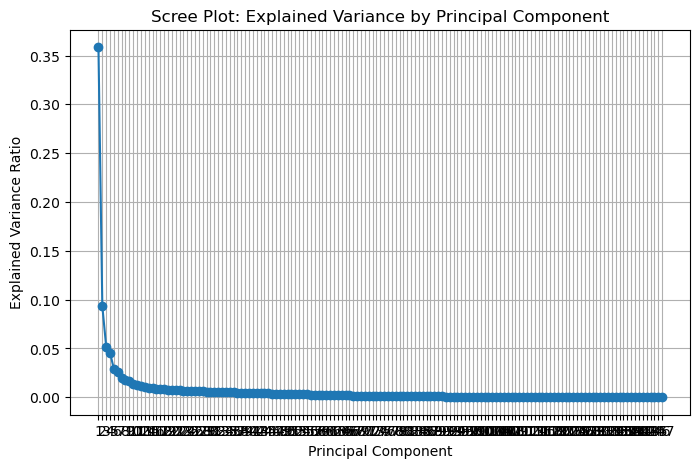

In [269]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='-')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.show()

Two components account for 94% of variance. Three account for 95%, so you only add small percentages of variance explained by adding more components. Four companents account for about 97% of variance and additional component account for almost no additional variance, so no point in having more than 4 component. The first two account for majority of variance. 

In [272]:
# For four components

In [274]:
pca = PCA(n_components=4)  # You can adjust this number as needed
weather_pca = pca.fit_transform(weather_features)

In [276]:
# Create a PCA DataFrame and merge back

In [278]:
pca_df = pd.DataFrame(weather_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [280]:
# Combine with original dataframe
weather_with_pca = pd.concat([df_final.reset_index(drop=True), pca_df], axis=1)


In [282]:
weather_with_pca.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_precipitation  \
0         -0.179228       -0.902918  ...               -0.088407   
1         -0.179228       -0.810126  ...                0.503361   
2         -0.179228       -1.065304  ...               -0.396127   
3         -0.179228       -0.114186  ...                0.669056   
4         -0.179228        0.187388  ...               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max       PC1       PC2       PC3  \
0          -0.519743          -0.752237 -6.396171 -3.573532  2.885211   
1          -0.629054          -0.407141 -6.845411 -3.673925  2.222973   
2           0.054135          -0.177078 -7.151443 -2.681750  2.216665   
3          -0.164486          -0.838511 -7.674213 -0.221483  3.844451   
4          -1.339569          -1.471186 -7.387268 -0.437302  3.276499   

        PC4  
0 -3.052005  
1 -0.497763  
2  2.742328  
3  2.469539  
4  0.931901  

[5 rows x 153 columns]

# 5 Cluster analysis on data reduced to 4 principal components

In [328]:
# Select data for 2020

In [286]:
weather_with_pca2020 = weather_with_pca[(weather_with_pca["DATE"] >= 20200101) & (weather_with_pca["DATE"] <= 20201231)]

In [288]:
# Repeating the dendograms but on the components ratter than all the weather variables

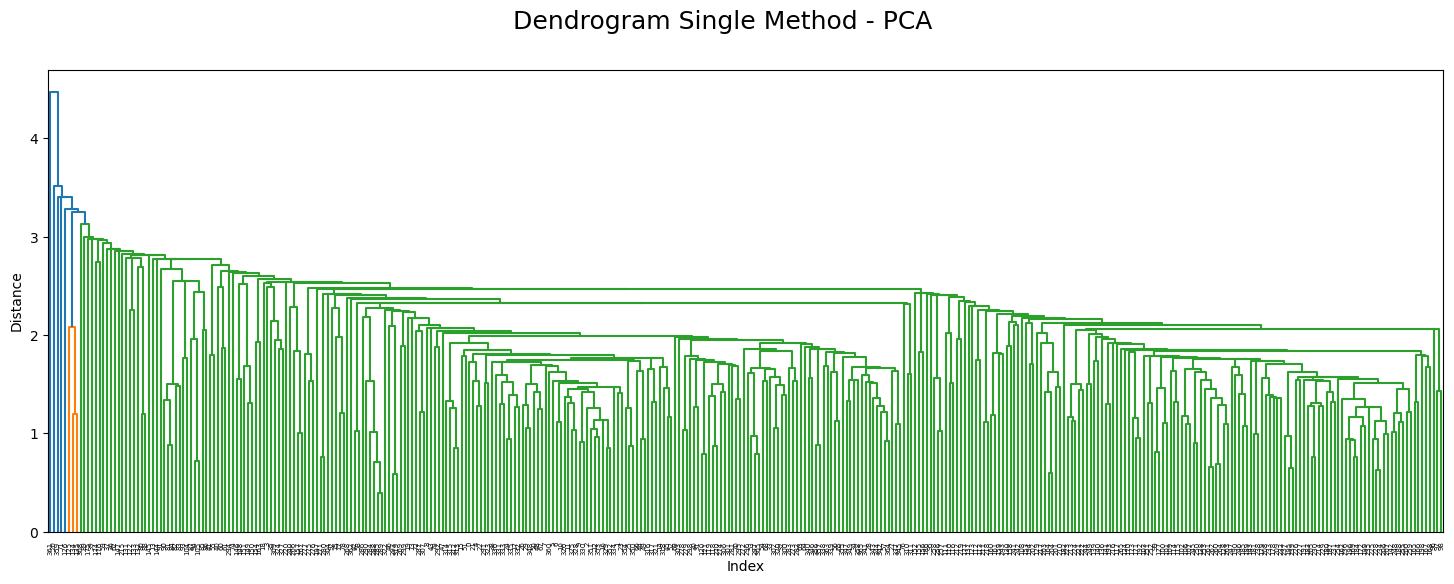

In [290]:
distance_single = linkage(weather_with_pca2020.loc[:,
['PC1',
 'PC2',
 'PC3',
 'PC4']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - PCA",fontsize=18)
plt.show()

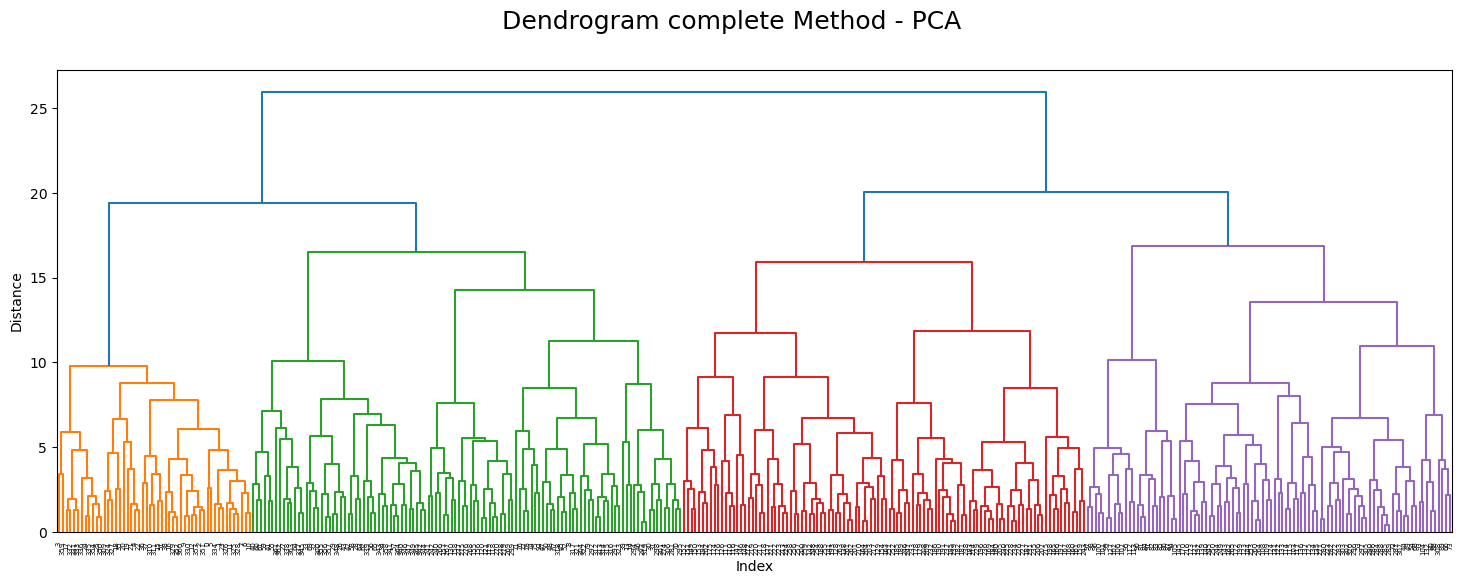

In [292]:
distance_complete = linkage(weather_with_pca2020.loc[:,
['PC1',
 'PC2',
 'PC3',
 'PC4']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram complete Method - PCA",fontsize=18)
plt.show()

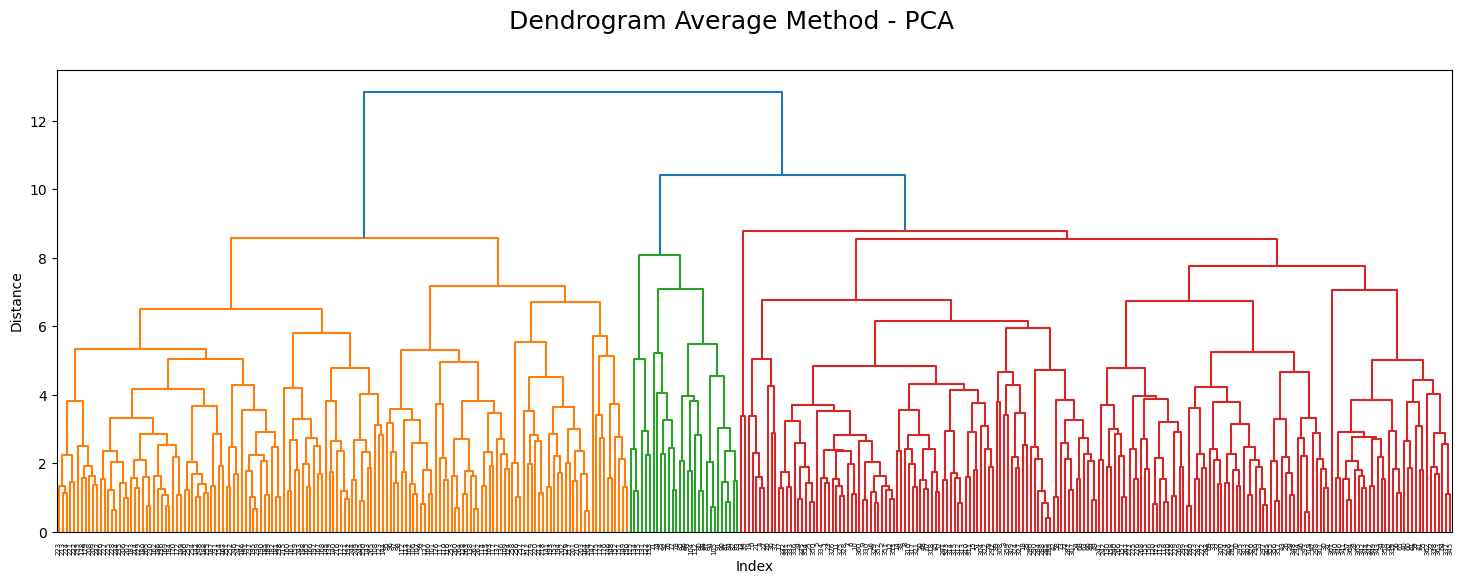

In [294]:
distance_average = linkage(weather_with_pca2020.loc[:,
['PC1',
 'PC2',
 'PC3',
 'PC4']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - PCA",fontsize=18)
plt.show()

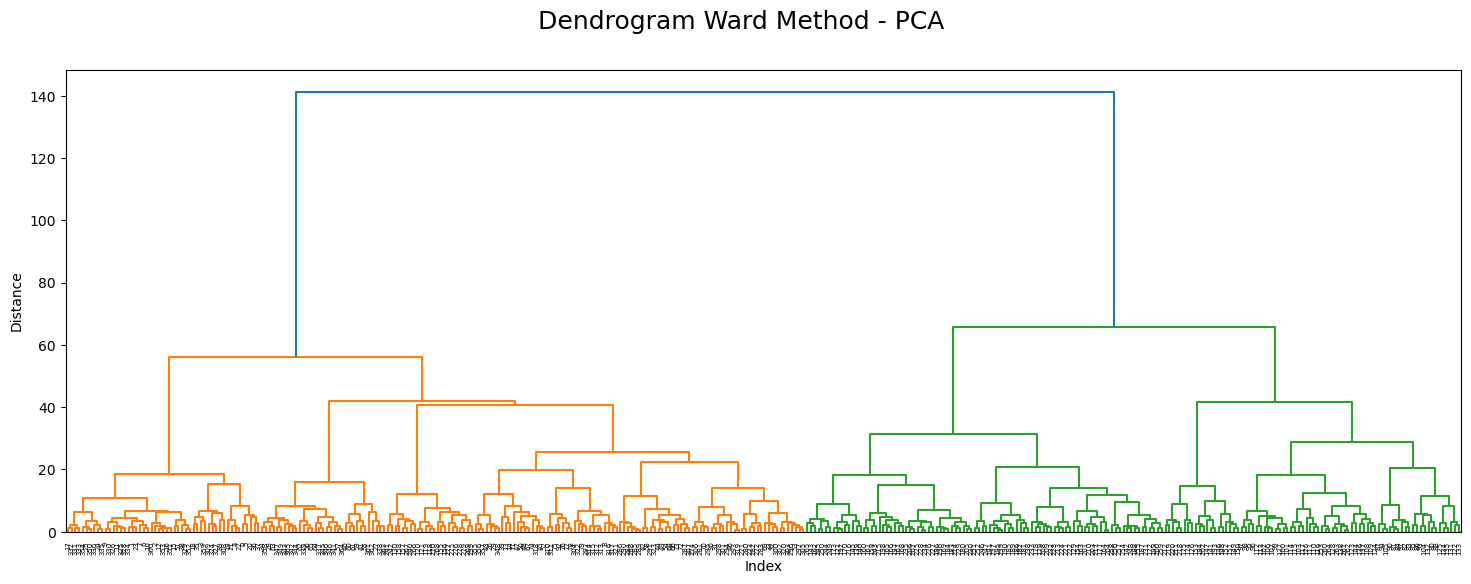

In [296]:
distance_ward = linkage(weather_with_pca2020.loc[:,
['PC1',
 'PC2',
 'PC3',
 'PC4']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - PCA",fontsize=18)
plt.show()

Looks like ward method managed to classify days similarly to pleasant/unpleasant classification since there are two big categories. Need to plot these classifiations against true classifications to see if they match

In [299]:
# Choose number of clusters (e.g., 2 based on dendrogram)
cluster_labels = fcluster(distance_ward, t=2, criterion='maxclust')

In [301]:
df_pca_clusters = weather_with_pca2020.copy()

In [303]:
df_pca_clusters['Cluster_PCA'] = cluster_labels

In [305]:
df_pca_clusters['Cluster_PCA'].value_counts()

Cluster_PCA
1    194
2    172
Name: count, dtype: int64

# 6 Principal components, clusters and true labels plots

In [331]:
# Select pleasant weather classifications for 2020

In [308]:
pleasantweather_2020 = pleasantweather[(pleasantweather["DATE"] >= 20200101) & (pleasantweather["DATE"] <= 20201231)]

In [333]:
# Will plot Basel data

In [310]:
pleasantweather_BASEL = pleasantweather_2020[['DATE', 'BASEL_pleasant_weather']]

In [312]:
# Merge file with clusters and pleasant weather labels for one weather station, BASEL

In [314]:
df_pca_clusters_labels = df_pca_clusters.merge(pleasantweather_BASEL, on='DATE', how='left')

<Axes: title={'center': 'Pleasant Day'}, xlabel='PC1', ylabel='PC2'>

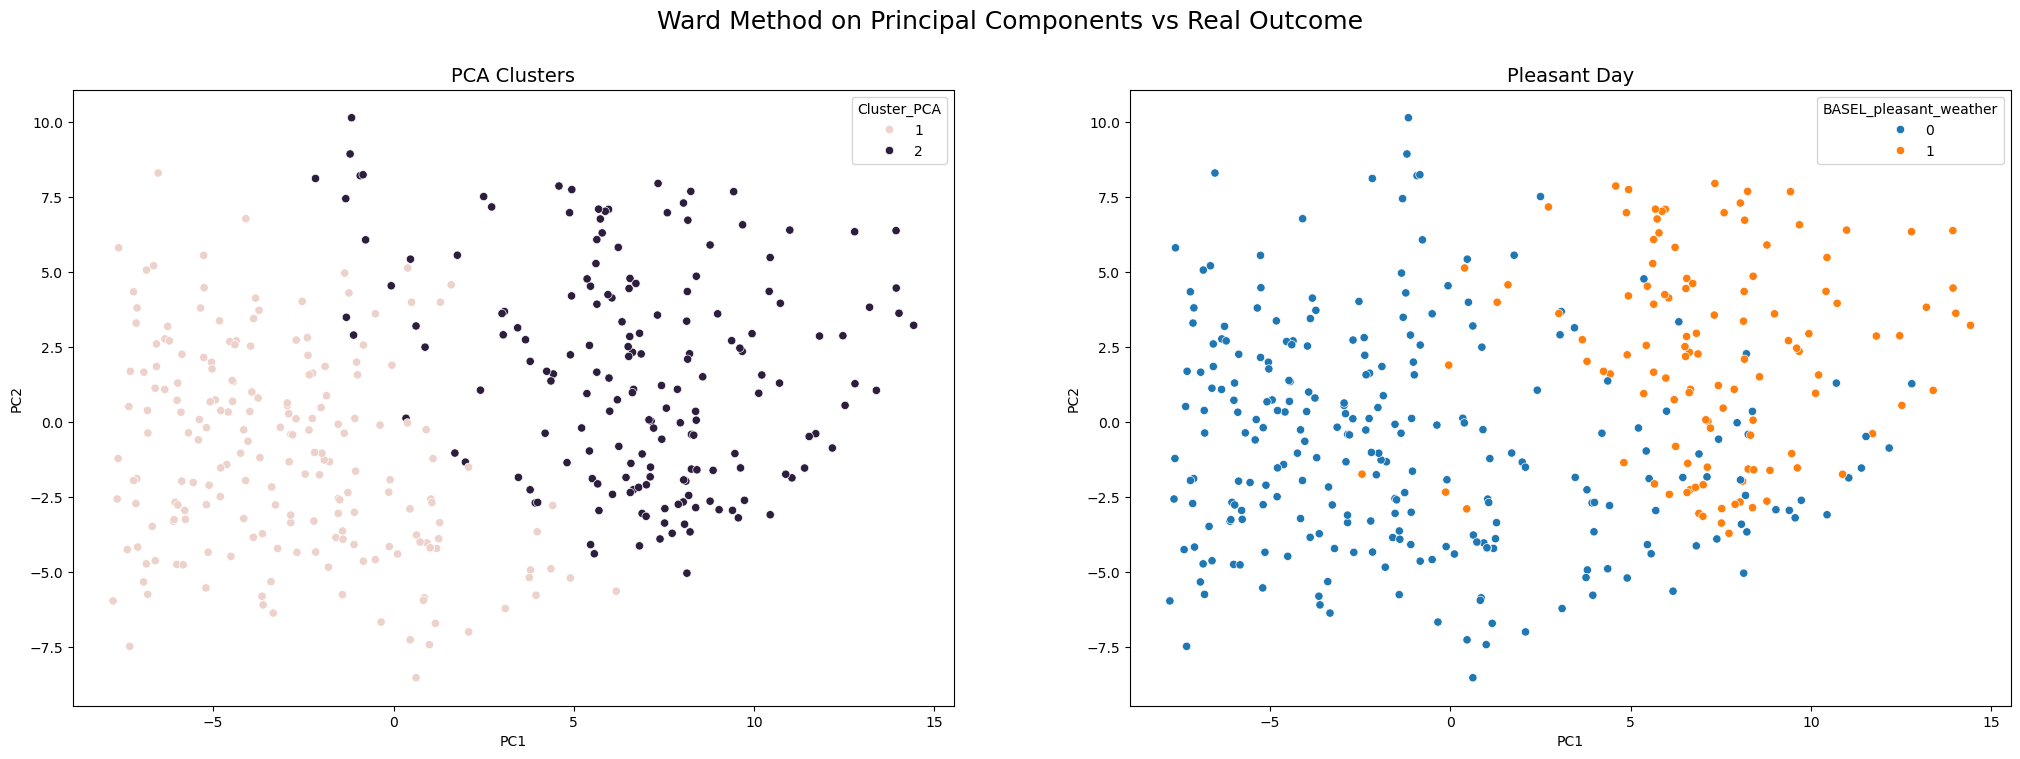

In [316]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method on Principal Components vs Real Outcome",fontsize=18)

plt.subplot(1,2,1)
plt.title("PCA Clusters",fontsize=14)
sns.scatterplot(x="PC1",y="PC2", data=df_pca_clusters_labels, hue="Cluster_PCA")

plt.subplot(1,2,2)
plt.title("Pleasant Day",fontsize=14)
sns.scatterplot(x="PC1",y="PC2", data=df_pca_clusters_labels, hue="BASEL_pleasant_weather")


They do look similar. Clustering based on principal components actually looks more separated than real labels. 

C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'PCA Clusters'}, xlabel='BASEL_pleasant_weather', ylabel='Cluster_PCA'>

C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


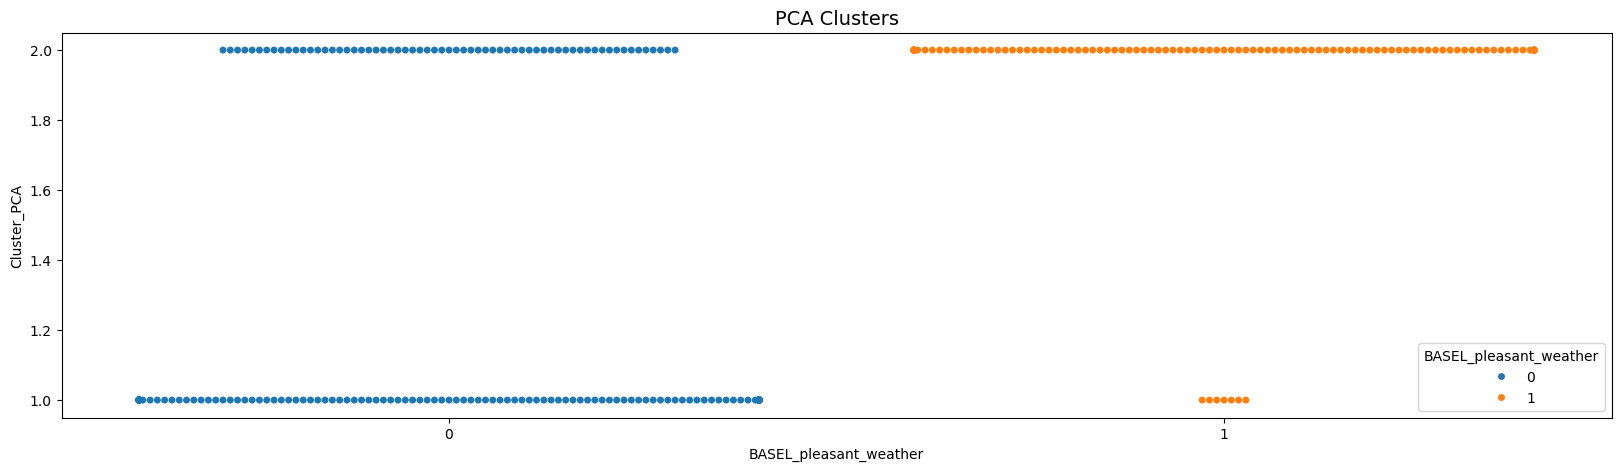

In [318]:
plt.figure(figsize=(20,5))
plt.title("PCA Clusters",fontsize=14)
sns.swarmplot(x="BASEL_pleasant_weather",y="Cluster_PCA", data=df_pca_clusters_labels, hue="BASEL_pleasant_weather")

<Axes: xlabel='BASEL_pleasant_weather', ylabel='Cluster_PCA'>

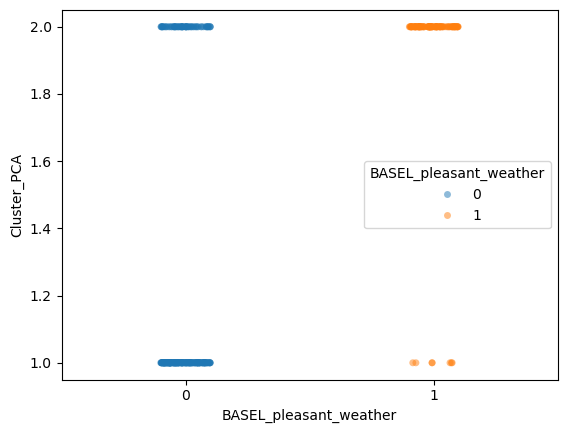

In [320]:
sns.stripplot(x='BASEL_pleasant_weather', y="Cluster_PCA", data=df_pca_clusters_labels, jitter=True, alpha=0.5, hue="BASEL_pleasant_weather")

There is disagreement between clusters and labels for Unpleasant days. There are few disagreements for Pleasant days. It seems the unsupervised machine learning did figure out a slightly different definition of pleasant vs unpleasant day.  

In unsupervised machine learning, we must carefully consider how we feed data into the analysis. While humans might weigh some weather conditions — such as temperature and lack of precipitation — more heavily when judging whether a day is "pleasant," unsupervised models treat all input features equally after scaling. If our goal is for the model to group or classify days in a way that aligns with human perception, we need to explicitly reflect the relative importance of each feature — either through weighting, feature engineering, or dimensionality reduction techniques informed by domain knowledge.